In [24]:
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Scatter # 导入散点图绘制模块
from pyecharts.commons.utils import JsCode
 
# 例1 自定义数据基本示例
y1=[[12,4],[2,5],[2,6],[3,15],[3,6]]
y2=[[8,2],[28,4],[18,6],[8,61],[7,2]]
scatter1=(
    Scatter()
    .add_xaxis(Faker.choose())
    .add_yaxis('数据1',y1)
    .add_yaxis('数据2',y2)
    .set_global_opts(title_opts=opts.TitleOpts(title='例1 scatter自定义数据基本示例'))
)
scatter1.render_notebook()

Duplicate key in file PosixPath('/Users/sunlf/Documents/huigu-project/wife-app/.venv/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 252 ('font.family:  sans-serif')
Duplicate key in file PosixPath('/Users/sunlf/Documents/huigu-project/wife-app/.venv/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 260 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')


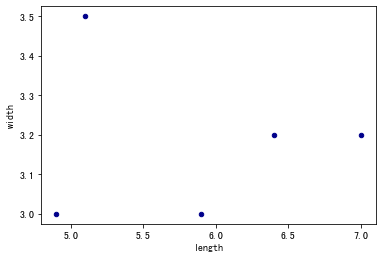

In [23]:
import pandas as pd
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['length', 'width', 'species'])
ax1 = df.plot.scatter(x='length',
                      y='width',
                      c='DarkBlue')

In [22]:
import pandas as pd

df=pd.read_csv("./data/3C数码1810.csv")
# df=pd.read_csv("./data/3C数码1710.csv",index_col="日期",parse_dates=True)
# df.info()
# print("成交金额"+df["成交金额"].sum())
# df['result']=df["成交金额"]/df["成交金额"].sum()

df.describe()

# print(df["买家数"].sum())
# df['result2']=df["买家数"]/df["买家数"].sum()

# print(424381111/2500340661)    
# print(25896640/71885408)
# df


,买家数,成交金额,搜索人数,客单价,UV价值
count,2.130000e+02,2.130000e+02,2.130000e+02,213.000000,213.000000
mean,3.374902e+05,1.173869e+07,6.858630e+05,339.510516,28.479108
std,2.173648e+06,4.121709e+07,3.177737e+06,880.309259,28.029166
min,0.000000e+00,0.000000e+00,1.600000e+01,0.000000,0.000000
25%,1.295000e+03,1.265170e+05,9.378000e+03,50.390000,10.100000
50%,6.537000e+03,7.472240e+05,4.301700e+04,101.420000,19.530000
75%,4.427200e+04,5.620142e+06,3.010960e+05,269.800000,33.670000
max,2.589664e+07,4.243811e+08,3.731913e+07,9270.040000,143.330000


In [4]:
df['开始日期']=df['日期'].apply(lambda x: x.split('|')[0])
df['结束日期']=df['日期'].apply(lambda x: x.split('|')[1])
df

,日期,类目名称,买家数,成交金额,搜索人数,成交金额占比,成交金额同比,成交人数占比,成交人数同比,客单价,UV价值,开始日期,结束日期
0,2017-10-01|2017-10-31,手机保护套/壳,27524495,503205377,82138973,38.16%,70.34%,52.07%,11.20%,18.28,6.13,2017-10-01,2017-10-31
1,2017-10-01|2017-10-31,手机贴膜,18384095,190704104,26656100,11.79%,28.26%,25.05%,16.74%,10.37,7.15,2017-10-01,2017-10-31
2,2017-10-01|2017-10-31,手机零部件,2125787,189281648,15767938,11.72%,12.75%,5.28%,11.70%,89.04,12.00,2017-10-01,2017-10-31
3,2017-10-01|2017-10-31,移动电源,2801112,188888518,14276910,11.70%,27.56%,7.22%,11.89%,67.43,13.23,2017-10-01,2017-10-31
4,2017-10-01|2017-10-31,手机数据线,4178627,153248705,10788473,8.04%,68.09%,11.07%,22.33%,36.67,14.20,2017-10-01,2017-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2017-10-01|2017-10-31,MP3/MP4支架,55,4751,2733,-,-43.97%,-,-32.18%,86.38,1.74,2017-10-01,2017-10-31
209,2017-10-01|2017-10-31,Lomo闪光灯,1,4275,57,-,-,-,-,4275.00,75.00,2017-10-01,2017-10-31
210,2017-10-01|2017-10-31,苹果卡贴,1,201,685,-,-91.10%,-,-68.02%,201.00,0.29,2017-10-01,2017-10-31
211,2017-10-01|2017-10-31,分压盒,10,198,682,-,-50.34%,-,303.66%,19.80,0.29,2017-10-01,2017-10-31


清洗数据，分离日期字段，分成了2个字段，同时把日期设置为index


In [ ]:
new_date=df['日期'].str.split("|", n = 1, expand = True) 
df['开始日期']=new_date[0]
df['结束日期']=new_date[1]
df['开始日期']=pd.to_datetime(df['开始日期'].astype(str),format='%Y-%m-%d')
df['结束日期']=pd.to_datetime(df['结束日期'].astype(str),format='%Y-%m-%d')
del df['日期'] 
df.set_index(df['开始日期'])


### 查看是否有重复的行数据？

In [ ]:
len(df.类目名称.unique())

draw a plot

In [ ]:
df.买家数.hist(bins=20)
df.head(10).boxplot(column="买家数",by="类目名称",figsize=(9,7))


In [ ]:


from pyecharts.faker import Faker
# print(Faker.choose())
# print(Faker.values())
# print(zip(Faker.choose(), Faker.values()))
result=[list(z) for z in zip(Faker.choose(), Faker.values())]
result

In [ ]:

df['hello']=round(df.成交金额/df.成交金额.sum(),2,)*100
df['world']=round(df.买家数/df.买家数.sum(),2,)*100
df['world1']=df.成交金额/df.成交金额.sum()*100
# df['hello1']='{:.2f}%'.format(df.成交金额/df.成交金额.sum()*100)
df

In [ ]:
df.loc[:,['类目名称','成交金额']].values.tolist()
df.loc[:,['类目名称','成交金额']].values.tolist()

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Page, Pie


pie=(
        Pie()
        .add("",df.loc[:,['类目名称','成交金额']].head(10).values.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="Pie-基本示例"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
        )

pie.render_notebook()


In [ ]:
from pyecharts.charts import Pie
 
 
attr = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
v1 = [11, 12, 13, 10, 10, 10]
pie = Pie("饼图示例")
pie.add(
    "",
    attr,
    v1,
    is_label_show=True,
    is_more_utils=True
)
pie.render_notebook()

In [ ]:
df.类目名称.value_counts()

In [ ]:
import pandas as pd

df1711=pd.read_csv("./data/3C数码1711.csv")
df1711.类目名称.value_counts()

折线图echarts 例子

In [ ]:
x_data = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
y_data = [820, 932, 901, 934, 1290, 1330, 1320]
y1_data = [824, 922, 932, 954, 390,  330, 2320]
from pyecharts import options as opts
from pyecharts.charts import Line

(
    Line()
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="A",
        y_axis=y_data,
        symbol="emptyCircle1",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="B",
        y_axis=y1_data,
        symbol="emptyCircle2",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .render_notebook()
)

